# Uber Movement: Creating a two-factor model

## Initial Setup
Import 'Travel_Times.csv' & Packages: 

In [381]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


#### First, we import the Quarter 1 (Jan-Mar) aggregate data from 2016. By slicing the unique column of our Origin ID (3843) and our destination ID (3582), we isolate the Mean Travel Time for the given Date Range. We will call this Q1 2016 Mean Travel Time.

In [382]:
ttd = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times 16.csv',index_col=0,parse_dates=True)
tt[tt['Destination Movement ID']==3582]

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
329,3843,100611 (3843),3582,100101 (3582),"1/1/2016 - 3/31/2016, Every day, Daily Average",924,589,1447


#### Next we import and Sort 'Travel_Times_Daily.csv':
- Organize rows by descending date

In [383]:
ttd = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times_Daily 16.csv',index_col=0,parse_dates=True)
ttd.sort_index(ascending=True)
#90 rows x 23 columns

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3843,100611 (3843),3582,100101 (3582),1181,621,2243,NaN,NaN,NaN,...,NaN,633.0,422.0,948.0,NaN,NaN,NaN,854.0,515.0,1418.0
2016-01-02,3843,100611 (3843),3582,100101 (3582),866,559,1342,NaN,NaN,NaN,...,1198.0,788.0,563.0,1101.0,918.0,545.0,1547.0,NaN,NaN,NaN
2016-01-03,3843,100611 (3843),3582,100101 (3582),702,462,1067,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,422.0,939.0
2016-01-04,3843,100611 (3843),3582,100101 (3582),855,570,1283,1304.0,749.0,2270.0,...,NaN,NaN,NaN,NaN,717.0,516.0,997.0,NaN,NaN,NaN
2016-01-05,3843,100611 (3843),3582,100101 (3582),787,577,1074,NaN,NaN,NaN,...,NaN,695.0,512.0,944.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,3843,100611 (3843),3582,100101 (3582),1091,679,1752,1044.0,785.0,1390.0,...,NaN,NaN,NaN,NaN,887.0,587.0,1339.0,NaN,NaN,NaN
2016-01-07,3843,100611 (3843),3582,100101 (3582),914,586,1427,951.0,577.0,1567.0,...,NaN,937.0,704.0,1247.0,870.0,666.0,1137.0,NaN,NaN,NaN
2016-01-08,3843,100611 (3843),3582,100101 (3582),857,568,1293,1134.0,782.0,1645.0,...,NaN,918.0,772.0,1092.0,828.0,598.0,1145.0,495.0,406.0,602.0
2016-01-09,3843,100611 (3843),3582,100101 (3582),657,445,972,NaN,NaN,NaN,...,1894.0,NaN,NaN,NaN,981.0,539.0,1786.0,551.0,412.0,737.0


note: NaN values for given days

## Setting Up the Model
#### Here we use the Daily Mean Travel Time and Plot it using a Sigmoid function to classify daily averages above or below the Quarterly Mean 

I have created a new column, which determines whether or not the Daily Mean Travel Time is above or below the Q1 Mean Travel Time called 'Above Mean'. Next I have sliced the columns 'Daily Mean Travel Time (Seconds)' and 'Above Mean', and plotted them on a scatterplot pictured below.

In [396]:
ttda = pd.DataFrame(ttd)  
ttda['Above Mean'] = ttda['Daily Mean Travel Time (Seconds)'] > 924 
ttda1 = ttda.loc[:,('Daily Mean Travel Time (Seconds)','Above Mean')]

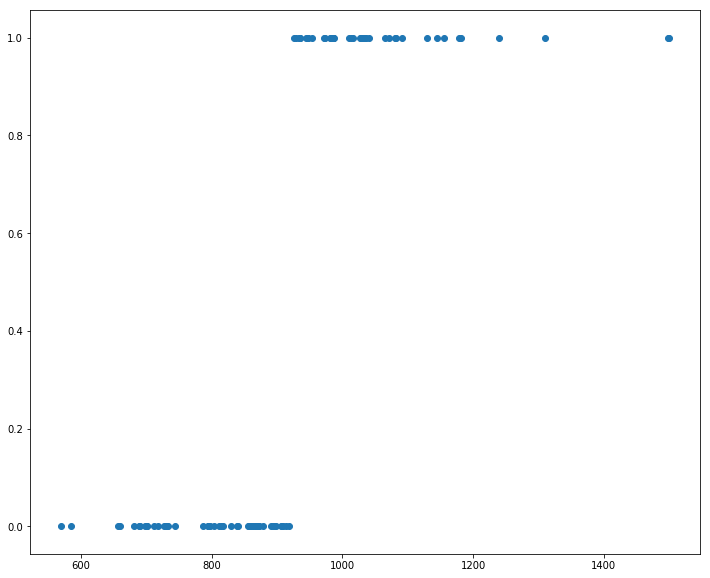

In [385]:
scatter(ttda1['Daily Mean Travel Time (Seconds)'],ttda1['Above Mean']);

## Model Fitting & Testing

Our next step is to convert reshape our Y variable ('Daily Mean Travel Time (Seconds) and to fit our logistic regression to the shape of a Sigmoid function.

In [386]:
ttda1['Daily Mean Travel Time (Seconds)'].values.reshape(-1,1)

array([[1155],
       [1500],
       [1041],
       [ 871],
       [ 585],
       [ 702],
       [ 744],
       [ 972],
       [1014],
       [ 906],
       [1031],
       [ 682],
       [ 569],
       [ 981],
       [ 973],
       [ 803],
       [1181],
       [ 866],
       [ 702],
       [ 855],
       [ 787],
       [1091],
       [ 914],
       [ 857],
       [ 657],
       [ 660],
       [1145],
       [ 878],
       [ 987],
       [1498],
       [ 986],
       [ 795],
       [1071],
       [ 896],
       [1082],
       [ 840],
       [ 926],
       [ 929],
       [ 872],
       [ 718],
       [ 935],
       [ 814],
       [ 794],
       [ 732],
       [1027],
       [ 818],
       [ 698],
       [1081],
       [1036],
       [ 830],
       [ 907],
       [1066],
       [ 918],
       [ 712],
       [ 860],
       [ 898],
       [1130],
       [ 936],
       [1032],
       [1239],
       [ 689],
       [ 690],
       [ 734],
       [1017],
       [ 839],
       [ 944],
       [ 8

Next, we set up a logistic regression that fits the 'Daily Mean Travel Time' on the x-axis and our newly generated 'Above Mean' on the y-axis and generate a slope and y-intercept and fit it to our 2016 data

In [318]:
logreg = linear_model.LogisticRegression(solver='newton-cg')
#X = cr['Hours Researched'].reset_index().values
#Create model
X = ttda1['Daily Mean Travel Time (Seconds)'].values.reshape(-1,1)
Y = ttda1['Above Mean']
#Fit data to model
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [319]:
travel_time_slope = logreg.coef_[0][0]
logreg.coef_[0][0]
#Note positive correlation and rate

0.65620204252351533

In [320]:
np.exp(logreg.coef_[0][0] - 1)
#Rate of value increase for one additional hour researched

0.70907217630975961

In [321]:
travel_time_intercept = logreg.intercept_[0]
logreg.intercept_[0]

-604.98294076315324

With our newly created parameters 'travel_time_slope' and 'travel_time_intercept', I now shape the data to the form of a Sigmoid function using the logreg function. 

(500, 1700)

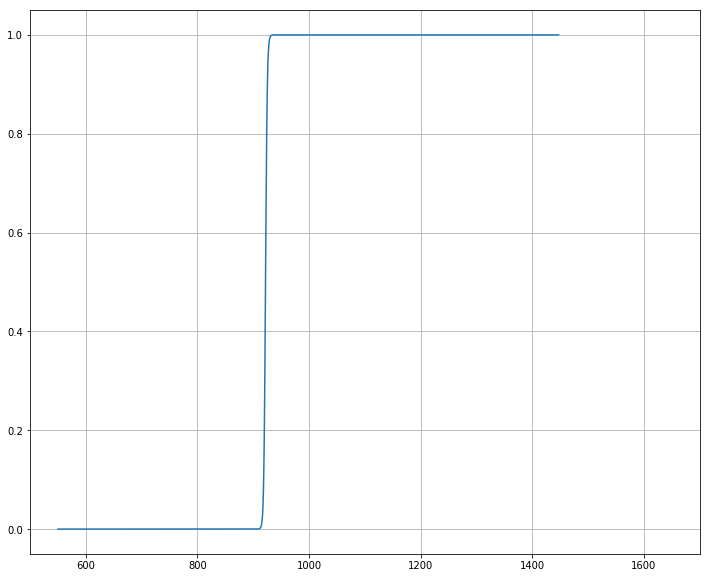

In [322]:
a = logreg.coef_[0][0]
b = logreg.intercept_[0]
x = x = np.arange(550,1447,0.01)
plt.plot(x,special.expit(a*x+b))
plt.grid()
plt.xlim(500,1700)

Now we trace along the generated probabilities from our model

In [323]:
Daily_Average = ttda1['Daily Mean Travel Time (Seconds)']
pr = pd.DataFrame({'Daily Average':Daily_Average,'Pr Above':[special.expit(a*x+b) for x in Daily_Average]})
pr.sort_index(ascending=True)

,Daily Average,Pr Above
Date,,
2016-01-01,1181,1.000000e+00
2016-01-02,866,1.138133e-16
2016-01-03,702,2.082885e-63
2016-01-04,855,8.343706e-20
2016-01-05,787,3.486455e-39
2016-01-06,1091,1.000000e+00
2016-01-07,914,5.408965e-03
2016-01-08,857,3.099765e-19
2016-01-09,657,3.121358e-76


Plotting our newly generated probabilities, we see the general shape of the Sigmoid function as expected. Using the newly generated curve, we can now use the logreg function to predict if given a Daily Mean Travel Time if it is above or below the Q1 Mean Travel Time.

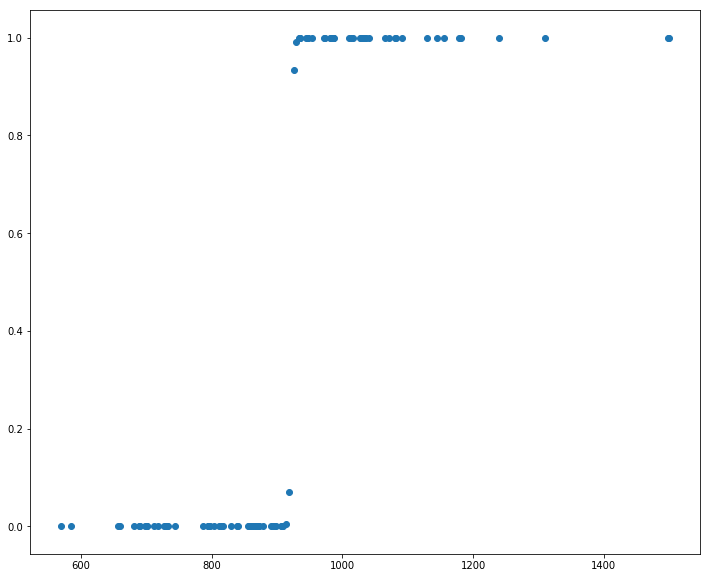

In [507]:
s16 = scatter(pr['Daily Average'],pr['Pr Above'])

In [325]:
logreg.predict([[921]])[0]

False

In [326]:
logreg.predict([[922]])[0]

True

So for a given Daily Average, the Probability in the far column shows the proportion of trips that were above the Quarterly Average with a difference of 3 seconds from the actual mean.

# Testing the Model with 2017 Data

While our initial model is interesting, it performs the glorified task of telling us whether a number is higher or lower than our observed quarterly mean.

Here we have the same sample size (subtracting the Leap Year days). Using the same Q1 dates in 2017, we apply the model to the same Origin and Destination IDs and see how accurate it can deduce if a trip is below or above the average Travel Time without knowing the true mean.

In [327]:
tt17 = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times 17.csv',index_col=0,parse_dates=True)
tt17.head()

,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
Origin Movement ID,,,,,,,
3843,100611 (3843),1845,910670 (1845),"1/1/2017 - 3/31/2017, Every day, Daily Average",2379,1891,2992
3843,100611 (3843),1963,809980 (1963),"1/1/2017 - 3/31/2017, Every day, Daily Average",2624,2371,2902
3843,100611 (3843),1975,80997A (1975),"1/1/2017 - 3/31/2017, Every day, Daily Average",2710,2288,3209
3843,100611 (3843),1977,810014 (1977),"1/1/2017 - 3/31/2017, Every day, Daily Average",2675,2118,3376
3843,100611 (3843),1994,910502 (1994),"1/1/2017 - 3/31/2017, Every day, Daily Average",2400,2059,2796


In [328]:
ttd17 = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times_Daily 17.csv',index_col=0,parse_dates=True)
ttd17.sort_index(ascending=True)
#90 Rows, 22 Rows

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,3843,100611 (3843),3582,100101 (3582),843,540,1314,612.0,422.0,889.0,...,1273.0,977,691,1380,818,622,1077,848.0,541.0,1329.0
2017-01-02,3843,100611 (3843),3582,100101 (3582),692,460,1041,520.0,347.0,781.0,...,814.0,915,801,1043,747,468,1190,NaN,NaN,NaN
2017-01-03,3843,100611 (3843),3582,100101 (3582),963,677,1368,1050.0,840.0,1312.0,...,NaN,838,586,1198,875,616,1244,679.0,434.0,1061.0
2017-01-04,3843,100611 (3843),3582,100101 (3582),894,611,1308,967.0,752.0,1243.0,...,2235.0,990,730,1343,922,636,1334,603.0,403.0,902.0
2017-01-05,3843,100611 (3843),3582,100101 (3582),958,603,1520,1107.0,895.0,1369.0,...,NaN,1134,871,1477,884,575,1359,594.0,488.0,723.0
2017-01-06,3843,100611 (3843),3582,100101 (3582),1042,746,1454,1128.0,896.0,1421.0,...,1435.0,1101,820,1479,962,654,1417,780.0,535.0,1136.0
2017-01-07,3843,100611 (3843),3582,100101 (3582),744,529,1045,NaN,NaN,NaN,...,1359.0,946,703,1273,705,535,929,681.0,474.0,978.0
2017-01-08,3843,100611 (3843),3582,100101 (3582),684,472,991,NaN,NaN,NaN,...,1356.0,815,587,1132,772,517,1151,641.0,455.0,903.0
2017-01-09,3843,100611 (3843),3582,100101 (3582),877,617,1247,1289.0,931.0,1784.0,...,NaN,863,568,1312,827,597,1146,NaN,NaN,NaN


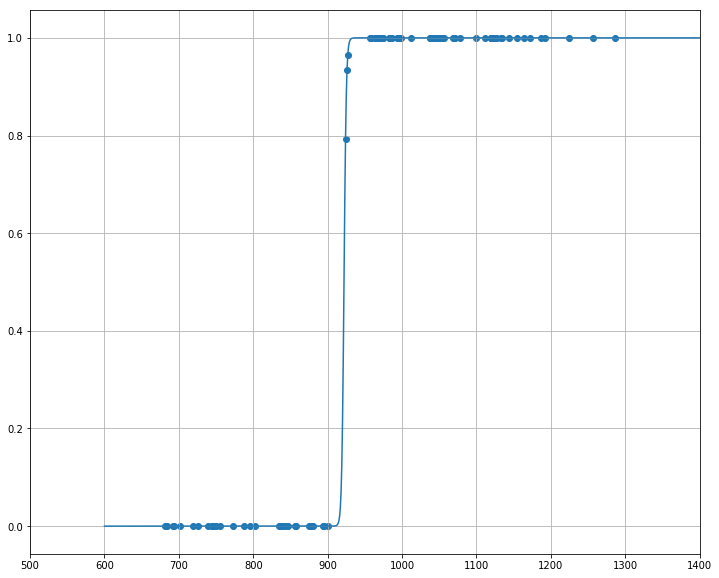

In [329]:
a = logreg.coef_[0][0]
b = logreg.intercept_[0]
x = arange(600,1550)
plt.plot(x,special.expit(a*x+b))
plt.grid()
plt.xlim(500,1400);
scatter(pr17['Daily Average'],pr17['Pr Above']);

In [348]:
Daily_Average = ttd17['Daily Mean Travel Time (Seconds)']
pr17 = pd.DataFrame({'Daily Average':Daily_Average,'Pr Above':[special.expit(a*x+b) for x in Daily_Average]})
pr17.sort_index(ascending=True).head()

,Daily Average,Pr Above
Date,,
2017-01-01,843,3.173510e-23
2017-01-02,692,2.943175e-66
2017-01-03,963,1.000000e+00
2017-01-04,894,1.085853e-08
2017-01-05,958,1.000000e+00


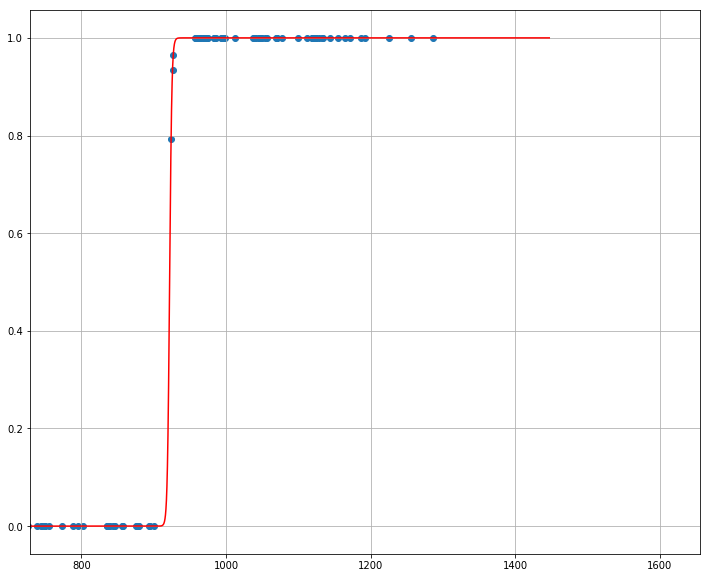

In [352]:
a = logreg.coef_[0][0]
b = logreg.intercept_[0]
x = np.arange(550,1447,0.01)
plt.plot(x,special.expit(a*x+b),color='red')
plt.grid()
plt.xlim(729,1655);
s17 = scatter(pr17['Daily Average'],pr17['Pr Above'])

In [332]:
logreg.predict([[921]])[0]

False

In [333]:
logreg.predict([[922]])[0]

True

#### As seen together, both curves demonstrate similar distributions

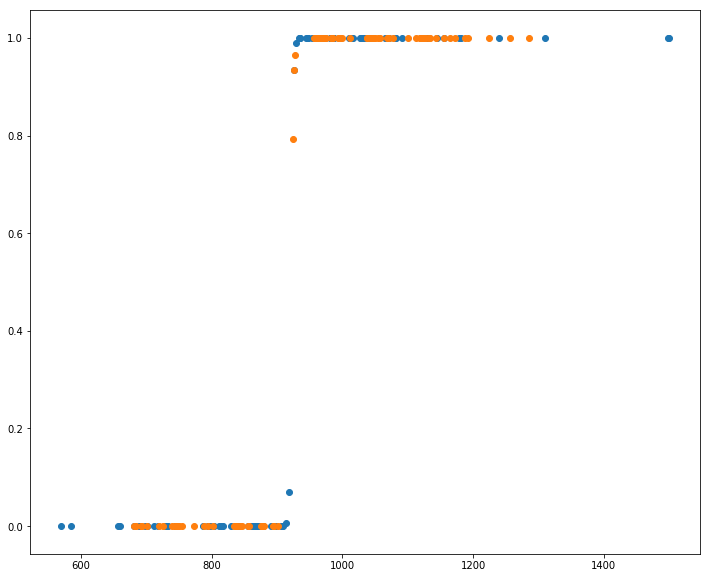

In [334]:
scatter(pr['Daily Average'],pr['Pr Above']);
scatter(pr17['Daily Average'],pr17['Pr Above']);

In [508]:
tt17 = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times 17.csv',index_col=0,parse_dates=True)
tt17[tt17['Destination Movement ID']==3582]

,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
Origin Movement ID,,,,,,,
3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day, Daily Average",969,625,1501


#### As we can see, our new model is less accurate and predicts a similar mean with a difference of under 60 seconds difference of the actual Mean Travel Time for 2017.

# Further Testing: Time Bins (Mon-Fri)
Here we test the same model using the conditions of Daily trips by restricting our original Test_Trips_Daily.csv file to weekdays only, and test using new averages (of AM/PM Peak Times)

Using https://www.uber.com/drive/san-francisco/where-to-drive/ we want to observe the following peak time groups:

 <img src="https://i.imgur.com/LJwko5m.png",width=300,height=500>
 
 For this example, I will apply our model to the time grouping [Mon-Fri: 7am-10am].

In [401]:
ttdwd = ttd[ttd.index.weekday<5]
ttdwd.sort_index(ascending=True)

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3843,100611 (3843),3582,100101 (3582),1181,621,2243,NaN,NaN,NaN,...,633.0,422.0,948.0,NaN,NaN,NaN,854.0,515.0,1418.0,True
2016-01-04,3843,100611 (3843),3582,100101 (3582),855,570,1283,1304.0,749.0,2270.0,...,NaN,NaN,NaN,717.0,516.0,997.0,NaN,NaN,NaN,False
2016-01-05,3843,100611 (3843),3582,100101 (3582),787,577,1074,NaN,NaN,NaN,...,695.0,512.0,944.0,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-01-06,3843,100611 (3843),3582,100101 (3582),1091,679,1752,1044.0,785.0,1390.0,...,NaN,NaN,NaN,887.0,587.0,1339.0,NaN,NaN,NaN,True
2016-01-07,3843,100611 (3843),3582,100101 (3582),914,586,1427,951.0,577.0,1567.0,...,937.0,704.0,1247.0,870.0,666.0,1137.0,NaN,NaN,NaN,False
2016-01-08,3843,100611 (3843),3582,100101 (3582),857,568,1293,1134.0,782.0,1645.0,...,918.0,772.0,1092.0,828.0,598.0,1145.0,495.0,406.0,602.0,False
2016-01-11,3843,100611 (3843),3582,100101 (3582),1145,613,2139,NaN,NaN,NaN,...,NaN,NaN,NaN,1236.0,579.0,2638.0,NaN,NaN,NaN,True
2016-01-12,3843,100611 (3843),3582,100101 (3582),878,572,1347,949.0,596.0,1509.0,...,835.0,579.0,1204.0,575.0,384.0,860.0,NaN,NaN,NaN,False
2016-01-13,3843,100611 (3843),3582,100101 (3582),987,568,1715,1133.0,958.0,1339.0,...,907.0,700.0,1174.0,775.0,440.0,1367.0,NaN,NaN,NaN,True


Taking the newly assorted data, we look at the Quarterly Mean average time taken over Monday to Friday using basic arithmetic.

In [346]:
ttdw = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times_time_of_day 17.csv')
ttdw

,Time Of Day,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,Daily Average,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",NaN,NaN,NaN
1,AM Peak,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",1099.0,729.0,1655.0
2,Midday,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",1033.0,726.0,1470.0
3,PM Peak,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",1252.0,855.0,1834.0
4,Evening,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",855.0,591.0,1235.0
5,Early Morning,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",679.0,432.0,1068.0


In [337]:
ttdw.loc[1:1,:]

,Time Of Day,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
1,AM Peak,3843,100611 (3843),3582,100101 (3582),"1/1/2017 - 3/31/2017, Every day",1099.0,729.0,1655.0


Repeating the same process we can reproduce the same model using the assorted daily weekday average times
#### Above AM Peak Mean

In [347]:
ttdwd['Above AM Mean'] = ttdwd['AM Mean Travel Time (Seconds)'] > 1099
ttdwd1 = ttdwd.loc[:,('AM Mean Travel Time (Seconds)','Above AM Mean')]
ttdwd1.head()

/Users/GLP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AM Mean Travel Time (Seconds),Above AM Mean
Date,,
2016-03-16,1252.0,True
2016-03-17,2078.0,True
2016-03-18,NaN,False
2016-03-21,891.0,False
2016-03-22,NaN,False


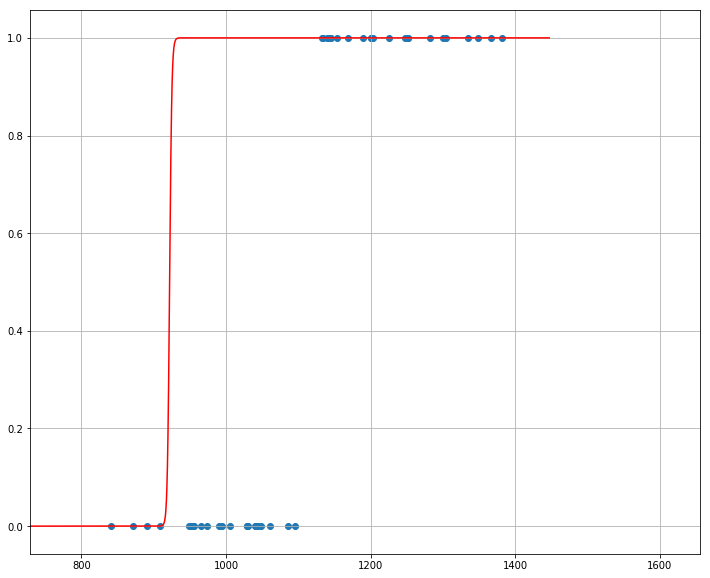

In [345]:
a = logreg.coef_[0][0]
b = logreg.intercept_[0]
x = np.arange(550,1447,0.01)
plt.plot(x,special.expit(a*x+b),color='red')
plt.grid()
plt.xlim(729,1655);
scatter(ttdwd1['AM Mean Travel Time (Seconds)'],ttdwd1['Above AM Mean']);

In [305]:
ttdwd1['AM Mean Travel Time (Seconds)'].values.reshape(-1,1)
#ttdwd1.dropna()

array([[ 1252.],
       [ 2078.],
       [   nan],
       [  891.],
       [   nan],
       [ 1145.],
       [ 1048.],
       [  872.],
       [   nan],
       [ 1086.],
       [ 1189.],
       [ 1043.],
       [   nan],
       [ 1304.],
       [   nan],
       [ 1044.],
       [  951.],
       [ 1134.],
       [   nan],
       [  949.],
       [ 1133.],
       [ 1143.],
       [ 1225.],
       [  638.],
       [ 1203.],
       [ 1061.],
       [ 1029.],
       [ 1300.],
       [  956.],
       [  955.],
       [ 1030.],
       [ 1282.],
       [  973.],
       [ 1334.],
       [ 1349.],
       [   nan],
       [  841.],
       [ 1095.],
       [  909.],
       [  990.],
       [ 1201.],
       [ 1367.],
       [ 1041.],
       [  670.],
       [   nan],
       [  966.],
       [   nan],
       [ 1029.],
       [  994.],
       [   nan],
       [ 1041.],
       [   nan],
       [   nan],
       [ 1382.],
       [ 1252.],
       [ 1201.],
       [ 1139.],
       [   nan],
       [   nan

#### Logistic Regression with Multiple features

<img src="https://i.imgur.com/xJuJL1A.png">

We will now attempt to improve the accuracy of our model by adding a second feature, if it is a weekday or weekend. As we see above, the average weekday [mon-fri] trip times are always higher than weekend [sat-sun]. What my goal here is to add a second feature to the Travel Time curve, and try to show that during weekends, expected travel times are lower than weekdays.

In [353]:
ttda.sort_index(ascending=True)

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3843,100611 (3843),3582,100101 (3582),1181,621,2243,NaN,NaN,NaN,...,633.0,422.0,948.0,NaN,NaN,NaN,854.0,515.0,1418.0,True
2016-01-02,3843,100611 (3843),3582,100101 (3582),866,559,1342,NaN,NaN,NaN,...,788.0,563.0,1101.0,918.0,545.0,1547.0,NaN,NaN,NaN,False
2016-01-03,3843,100611 (3843),3582,100101 (3582),702,462,1067,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,630.0,422.0,939.0,False
2016-01-04,3843,100611 (3843),3582,100101 (3582),855,570,1283,1304.0,749.0,2270.0,...,NaN,NaN,NaN,717.0,516.0,997.0,NaN,NaN,NaN,False
2016-01-05,3843,100611 (3843),3582,100101 (3582),787,577,1074,NaN,NaN,NaN,...,695.0,512.0,944.0,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-01-06,3843,100611 (3843),3582,100101 (3582),1091,679,1752,1044.0,785.0,1390.0,...,NaN,NaN,NaN,887.0,587.0,1339.0,NaN,NaN,NaN,True
2016-01-07,3843,100611 (3843),3582,100101 (3582),914,586,1427,951.0,577.0,1567.0,...,937.0,704.0,1247.0,870.0,666.0,1137.0,NaN,NaN,NaN,False
2016-01-08,3843,100611 (3843),3582,100101 (3582),857,568,1293,1134.0,782.0,1645.0,...,918.0,772.0,1092.0,828.0,598.0,1145.0,495.0,406.0,602.0,False
2016-01-09,3843,100611 (3843),3582,100101 (3582),657,445,972,NaN,NaN,NaN,...,NaN,NaN,NaN,981.0,539.0,1786.0,551.0,412.0,737.0,False


In [403]:
ttda[ttda.index.weekday<5]

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-16,3843,100611 (3843),3582,100101 (3582),1155,758,1762,1252.0,803.0,1950.0,...,NaN,NaN,NaN,1012.0,739.0,1384.0,NaN,NaN,NaN,True
2016-03-17,3843,100611 (3843),3582,100101 (3582),1500,706,3183,2078.0,975.0,4432.0,...,1295.0,707.0,2373.0,903.0,634.0,1285.0,NaN,NaN,NaN,True
2016-03-18,3843,100611 (3843),3582,100101 (3582),1041,750,1445,NaN,NaN,NaN,...,1289.0,864.0,1922.0,989.0,715.0,1369.0,540.0,384.0,758.0,True
2016-03-21,3843,100611 (3843),3582,100101 (3582),702,517,953,891.0,679.0,1169.0,...,876.0,675.0,1137.0,624.0,469.0,830.0,NaN,NaN,NaN,False
2016-03-22,3843,100611 (3843),3582,100101 (3582),744,515,1075,NaN,NaN,NaN,...,NaN,NaN,NaN,926.0,625.0,1373.0,551.0,426.0,714.0,False
2016-03-23,3843,100611 (3843),3582,100101 (3582),972,678,1392,1145.0,905.0,1450.0,...,1030.0,833.0,1273.0,804.0,576.0,1122.0,NaN,NaN,NaN,True
2016-03-24,3843,100611 (3843),3582,100101 (3582),1014,770,1336,1048.0,777.0,1413.0,...,1010.0,809.0,1261.0,1586.0,1001.0,2512.0,830.0,730.0,943.0,True
2016-03-25,3843,100611 (3843),3582,100101 (3582),906,588,1395,872.0,630.0,1207.0,...,1119.0,954.0,1313.0,781.0,533.0,1142.0,791.0,444.0,1407.0,False
2016-03-28,3843,100611 (3843),3582,100101 (3582),569,393,826,NaN,NaN,NaN,...,1426.0,762.0,2670.0,569.0,393.0,826.0,596.0,446.0,797.0,False


In [433]:
ttd2 = pd.read_csv('/Users/GLP/Desktop/Data Science/Uber Movement/Travel_Times_Daily 16.csv',index_col=0,parse_dates=True)
ttda2 = pd.DataFrame(ttd2)  
ttda2['Above Mean'] = ttda2['Daily Mean Travel Time (Seconds)'] > 924 
ttda2.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-16,3843,100611 (3843),3582,100101 (3582),1155,758,1762,1252.0,803.0,1950.0,...,NaN,NaN,NaN,1012.0,739.0,1384.0,NaN,NaN,NaN,True
2016-03-17,3843,100611 (3843),3582,100101 (3582),1500,706,3183,2078.0,975.0,4432.0,...,1295.0,707.0,2373.0,903.0,634.0,1285.0,NaN,NaN,NaN,True
2016-03-18,3843,100611 (3843),3582,100101 (3582),1041,750,1445,NaN,NaN,NaN,...,1289.0,864.0,1922.0,989.0,715.0,1369.0,540.0,384.0,758.0,True
2016-03-19,3843,100611 (3843),3582,100101 (3582),871,683,1111,811.0,538.0,1221.0,...,833.0,764.0,909.0,819.0,653.0,1026.0,702.0,489.0,1008.0,False
2016-03-20,3843,100611 (3843),3582,100101 (3582),585,392,873,404.0,298.0,548.0,...,NaN,NaN,NaN,NaN,NaN,NaN,672.0,453.0,994.0,False


Here we add a new column, 'Weekend', giving us a boolean value 1.0 if the date in the index is of 0-5 (mon-fri), and 0.0 if the index is of 6-7 (sat-sun). 

In [441]:
#ttda2['Date'] = pd.to_datetime(ttda2['Date'])
#ttda2['Day of Week'] = ttda2['Date'].dt.weekday_name
#ttda2.head()

ttda2['Weekend'] = ((pd.DatetimeIndex(ttda2.index).dayofweek) // 5 == 1).astype(float)
ttda2.sort_index(ascending=True)

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean,WEEKDAY,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3843,100611 (3843),3582,100101 (3582),1181,621,2243,NaN,NaN,NaN,...,948.0,NaN,NaN,NaN,854.0,515.0,1418.0,True,0.0,0.0
2016-01-02,3843,100611 (3843),3582,100101 (3582),866,559,1342,NaN,NaN,NaN,...,1101.0,918.0,545.0,1547.0,NaN,NaN,NaN,False,1.0,1.0
2016-01-03,3843,100611 (3843),3582,100101 (3582),702,462,1067,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,630.0,422.0,939.0,False,1.0,1.0
2016-01-04,3843,100611 (3843),3582,100101 (3582),855,570,1283,1304.0,749.0,2270.0,...,NaN,717.0,516.0,997.0,NaN,NaN,NaN,False,0.0,0.0
2016-01-05,3843,100611 (3843),3582,100101 (3582),787,577,1074,NaN,NaN,NaN,...,944.0,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,0.0
2016-01-06,3843,100611 (3843),3582,100101 (3582),1091,679,1752,1044.0,785.0,1390.0,...,NaN,887.0,587.0,1339.0,NaN,NaN,NaN,True,0.0,0.0
2016-01-07,3843,100611 (3843),3582,100101 (3582),914,586,1427,951.0,577.0,1567.0,...,1247.0,870.0,666.0,1137.0,NaN,NaN,NaN,False,0.0,0.0
2016-01-08,3843,100611 (3843),3582,100101 (3582),857,568,1293,1134.0,782.0,1645.0,...,1092.0,828.0,598.0,1145.0,495.0,406.0,602.0,False,0.0,0.0
2016-01-09,3843,100611 (3843),3582,100101 (3582),657,445,972,NaN,NaN,NaN,...,NaN,981.0,539.0,1786.0,551.0,412.0,737.0,False,1.0,1.0


In [442]:
ttda2[ttda2.index.weekday<5].sort_index(ascending=True).head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Above Mean,WEEKDAY,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3843,100611 (3843),3582,100101 (3582),1181,621,2243,NaN,NaN,NaN,...,948.0,NaN,NaN,NaN,854.0,515.0,1418.0,True,0.0,0.0
2016-01-04,3843,100611 (3843),3582,100101 (3582),855,570,1283,1304.0,749.0,2270.0,...,NaN,717.0,516.0,997.0,NaN,NaN,NaN,False,0.0,0.0
2016-01-05,3843,100611 (3843),3582,100101 (3582),787,577,1074,NaN,NaN,NaN,...,944.0,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,0.0
2016-01-06,3843,100611 (3843),3582,100101 (3582),1091,679,1752,1044.0,785.0,1390.0,...,NaN,887.0,587.0,1339.0,NaN,NaN,NaN,True,0.0,0.0
2016-01-07,3843,100611 (3843),3582,100101 (3582),914,586,1427,951.0,577.0,1567.0,...,1247.0,870.0,666.0,1137.0,NaN,NaN,NaN,False,0.0,0.0


Once produced, I slice the columns of 'Daily Mean', 'Above Mean', and the newly generated 'Weekend' and begin to reformat the new columns in arrays.

In [454]:
ttda3 = ttda2.loc[:,('Daily Mean Travel Time (Seconds)','Above Mean','Weekend')]
ttda3.sort_index(ascending=True)

,Daily Mean Travel Time (Seconds),Above Mean,Weekend
Date,,,
2016-01-01,1181,True,0.0
2016-01-02,866,False,1.0
2016-01-03,702,False,1.0
2016-01-04,855,False,0.0
2016-01-05,787,False,0.0
2016-01-06,1091,True,0.0
2016-01-07,914,False,0.0
2016-01-08,857,False,0.0
2016-01-09,657,False,1.0


In [458]:
ttda3.corr()

,Daily Mean Travel Time (Seconds),Above Mean,Weekend
Daily Mean Travel Time (Seconds),1.000000,0.755219,-0.30461
Above Mean,0.755219,1.000000,-0.33691
Weekend,-0.304610,-0.336910,1.00000


Having shaped the new dataframe into three columns (Daily Mean, Above Mean, and Weekend), we check the correlation. While the result is low, we must take note that it is inverted as our higher travel time dates (mon-fri) give us a boolean value of 0.0. Therefore, we proceed in adding the second feature.

In [464]:
ttda3['Daily Mean Travel Time (Seconds)'].values.reshape(-1,1)

array([[1155],
       [1500],
       [1041],
       [ 871],
       [ 585],
       [ 702],
       [ 744],
       [ 972],
       [1014],
       [ 906],
       [1031],
       [ 682],
       [ 569],
       [ 981],
       [ 973],
       [ 803],
       [1181],
       [ 866],
       [ 702],
       [ 855],
       [ 787],
       [1091],
       [ 914],
       [ 857],
       [ 657],
       [ 660],
       [1145],
       [ 878],
       [ 987],
       [1498],
       [ 986],
       [ 795],
       [1071],
       [ 896],
       [1082],
       [ 840],
       [ 926],
       [ 929],
       [ 872],
       [ 718],
       [ 935],
       [ 814],
       [ 794],
       [ 732],
       [1027],
       [ 818],
       [ 698],
       [1081],
       [1036],
       [ 830],
       [ 907],
       [1066],
       [ 918],
       [ 712],
       [ 860],
       [ 898],
       [1130],
       [ 936],
       [1032],
       [1239],
       [ 689],
       [ 690],
       [ 734],
       [1017],
       [ 839],
       [ 944],
       [ 8

In [466]:
ttda3['Weekend'].values.reshape(-1,1)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [467]:
ttda3['Above Mean'].values.reshape(-1,1)

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

Once reshaped, we add 'Daily Mean' and 'Weekend' to the x-axis and the 'Above Mean' to the y-axis. Unlike before, we are creating a 3d plane using two distinct Boolean values and one integer value to determine the probability of whether a trip time will be above or below the average trip time.

In [469]:
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = ttda3[['Daily Mean Travel Time (Seconds)','Weekend']]
#Two Variables on the X axis
Y = ttda3['Above Mean']
#One variable on the Y axis
lgrg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [473]:
TT_Wknd_coeff17 = lgrg.coef_[0][0] #First row, first column of matrix
TT_Wknd_coeff17
#X-Value
#Positive movement along the X-scale

0.65360179434630672

In [474]:
TT_Wknd_coeff17 = lgrg.coef_[0][1]
TT_Wknd_coeff17

-0.068026469780538917

In [475]:
TT_Wknd__intercept17 = lgrg.intercept_[0]
TT_Wknd__intercept17

-602.55439597475629

In [476]:
lgrg.intercept_

array([-602.55439597])

In [477]:
b1,b2 = lgrg.coef_[0]
b0 = lgrg.intercept_[0]
print(b1)
print(b2)
print(b0)

0.653601794346
-0.0680264697805
-602.554395975


With our newly generated slope and coefficient, we can now make predictions and test probabilities of a trip time being above the mean given the day of the week and the trip time.

In [509]:
def TT_model(TT,Wknd): #building model
    return special.expit(TT*b1+Wknd*b2+b0)
#Takes trip time and Weekend values
#Returns value along sigmoid function (x*b1 + y*b2 + e)

In [481]:
TT_model(922,1)

0.49960798576981752

In [482]:
lgrg.predict_proba([[922,1]])

array([[ 0.50039201,  0.49960799]])

In [484]:
lgrg.predict_proba(ttda3[["Daily Mean Travel Time (Seconds)","Weekend"]])

array([[  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  1.00000000e+000,   3.33181375e-015],
       [  1.00000000e+000,   2.18758058e-096],
       [  1.00000000e+000,   3.80731614e-063],
       [  1.00000000e+000,   3.18094640e-051],
       [  5.99520433e-015,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  9.99969299e-001,   3.07014400e-005],
       [  0.00000000e+000,   1.00000000e+000],
       [  1.00000000e+000,   7.48104671e-069],
       [  1.00000000e+000,   6.72693355e-101],
       [  0.00000000e+000,   1.00000000e+000],
       [  3.10862447e-015,   1.00000000e+000],
       [  1.00000000e+000,   1.77844262e-034],
       [  0.00000000e+000,   1.00000000e+000],
       [  1.00000000e+000,   1.26882712e-016],
       [  1.00000000e+000,   3.55693082e-063],
       [  1.00000000e+000,   1.02455150e-019],
       [  1.00000000e+000,   5.10915895e-039],
       [  0.0

While not overly exciting, we can plot a 3-d plane of our newly generated probabilities. This plane is 2-dimensional as two of our variables ('Weekend' and 'Above Mean') are boolean values. We can see the plot below.

In [485]:
import mpl_toolkits.mplot3d as m3d

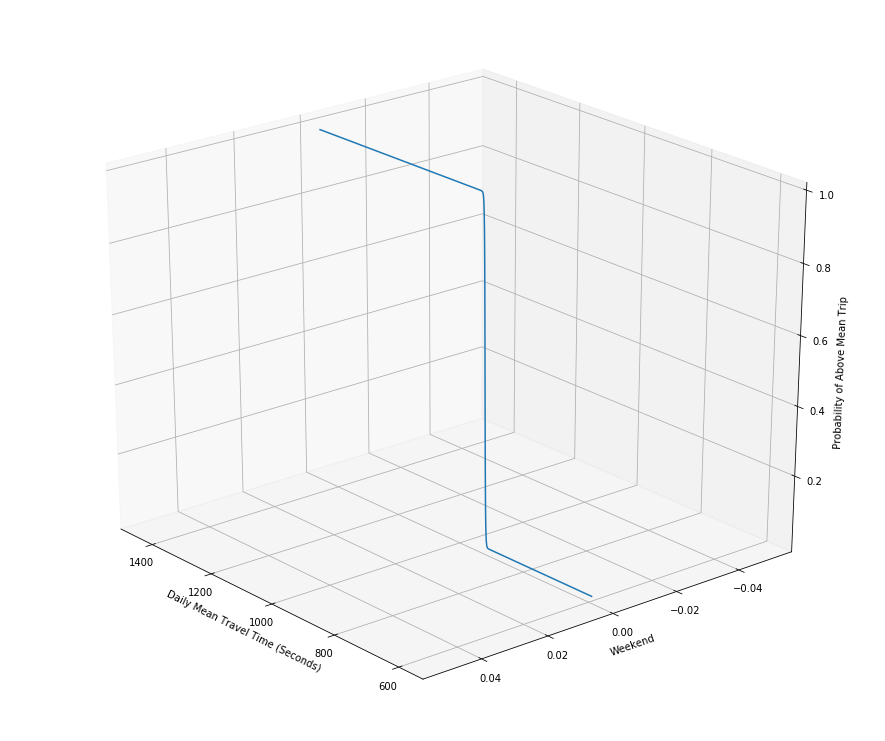

In [510]:
tt = np.arange(589,1447,1)
wk = np.arange(0,1,1)
xx, yy = np.meshgrid(tt, wk)
Z = TT_model(xx,yy)
fig3d = m3d.Axes3D(plt.figure())
fig3d.plot_wireframe(xx, yy, Z, rstride=10, cstride=10);
fig3d.set_xlabel('Daily Mean Travel Time (Seconds)')
fig3d.set_ylabel('Weekend')
fig3d.set_zlabel('Probability of Above Mean Trip')
fig3d.view_init(25, 140)
plt.show();

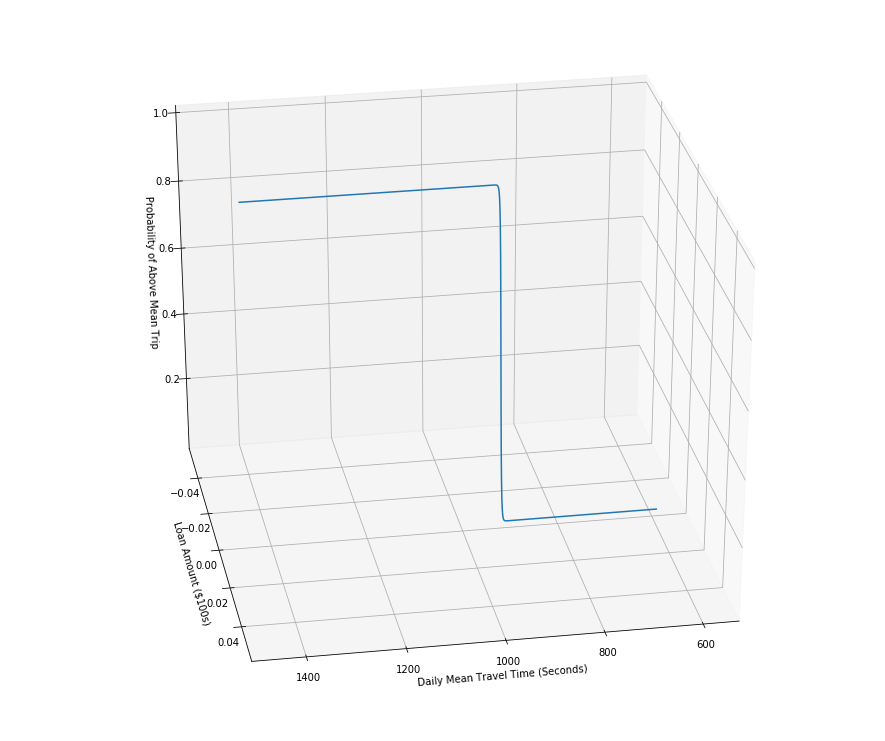

In [488]:
fig3d = m3d.Axes3D(plt.figure())
fig3d.plot_wireframe(xx, yy, Z, rstride=10, cstride=10);
fig3d.set_xlabel('Daily Mean Travel Time (Seconds)')
fig3d.set_ylabel('Loan Amount ($100s)')
fig3d.set_zlabel('Probability of Above Mean Trip')
fig3d.view_init(30, 80)
plt.show();

In [496]:
lgrg.predict([[922,0]])[0]

True

In [498]:
lgrg.predict([[922,1]])[0]
#Training data shows that 

False

In [500]:
TT_model(922,0)
#Predict probability of if trip is above Mean Travel Time

0.51660849066266468

In [502]:
TT_model(922,1)
#Shows that if it is the weekend, there is a lower probability that a trip will be over time

0.49960798576981752

## Conclusion and Next Steps

From our TT_model, we deduce that adding the second factor, 'Weekend', does (in accordance to our model) lower the probability of being above the Quarterly Average Trip Time given a positive value. Again this might present a fairly obvious conclusion, that there is less traffic on the weekdays facilitating shorter trip times. 

My earlier linear regressions, when applied to different time bins and different years, still follow the sigmoid function shape. While our 2016 model predicted a similar Quarterly Average Trip Time to 2017 under a minute, it cannot be labelled as definitive as it is held to only one variable.

Due to time restrictions, I submit this not having tested the model using 2017 data. The hypothesis is that by adding the second factor, I predict a more accurate probability of whether a given daily trip mean will be larger than the Quarterly Mean using my 'TT model'. 

The potential implications of this model are much farther reaching. In the future, I will look towards adding additional features to the model, such as classifying time groupings of the day into dummy variables. Other potential features could include the quarter of the year (not included largely due to Uber Movement's incomplete datasets). Lastly, nearby destination ID's could be compared to our intitial conditions. 

The importance of this model could potentially apply to both Uber drivers and Uber riders. For Uber drivers, this model could help understand when to expect longer than average trip times. This could allow drivers to more accurately plan out their total expected trips and their input usage. For Uber riders, this model could potentially allow riders to avoid busier trip times, or potentially change their destination to somewhere nearby which has a shorter trip time. 

Again, this model is exploratory and not explanatory. While the implications are vast, this model only touches the surface on a plethora of factors that Uber Movement does not capture. Looking to the future, as the Uber Movement project grows, so do the potential capabilities of its dataset.